In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\taleb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\taleb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
import os

# Obtener el directorio de trabajo actual
directorio_actual = os.getcwd()
print(directorio_actual)

c:\Users\taleb\Desktop\ULB\STIC-B545 - Traitement automatique de corpus\TP\tac\tps\tp3


In [4]:
data_path = "../../data/txt/"

1. Choisissez une décennie (1890–1899, 1900–1909, 1910–1919, etc.)

In [5]:
DECADE = '1960'
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [6]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

2. Effectuez un clustering des documents de cette décennie grâce au notebook s2_clustering.ipynb, en adaptant éventuellement le nombre de
clusters désirés


In [7]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [8]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [9]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\taleb\Desktop\ULB\STIC-B545 - Traitement automatique de corpus\TP\tac\tac_venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [76]:
N_CLUSTERS = 3

In [77]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [78]:
clusters = km_model.fit_predict(tfidf_vectors)
tfidf_vectors

<1000x2998 sparse matrix of type '<class 'numpy.float64'>'
	with 591558 stored elements in Compressed Sparse Row format>

In [79]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False).head(50)

rossel           0.429849
ecrire           0.290763
agence           0.287302
bilingue         0.195620
importante       0.172368
dem              0.169090
ag               0.168741
vitae            0.152509
cherche          0.146573
pr               0.131787
curriculum       0.131331
références       0.130899
clientèle        0.119770
prétentions      0.117769
flandres         0.116883
firme            0.116123
âge              0.105880
référ            0.105834
réf              0.101344
representant     0.100483
ecr              0.098225
societe          0.097307
manuscrite       0.091461
introduit        0.084273
num              0.084149
prêt             0.077980
fixe             0.077885
age              0.075632
élément          0.075390
not              0.075363
pratique         0.074211
préférence       0.073041
sténo-dactylo    0.071147
trav             0.068548
prés             0.065556
engage           0.063119
curr             0.063061
dactylo          0.059487
steno-dactyl

In [80]:
clusters = km_model.fit_predict(tfidf_vectors)
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])
pprint(dict(clustering))

{0: ['KB_JB838_1960-01-12_01-00011.txt',
     'KB_JB838_1960-01-13_01-00009.txt',
     'KB_JB838_1960-01-27_01-00006.txt',
     'KB_JB838_1960-01-28_01-00011.txt',
     'KB_JB838_1960-01-28_01-00021.txt',
     'KB_JB838_1960-01-30_01-00007.txt',
     'KB_JB838_1960-01-31_01-00024.txt',
     'KB_JB838_1960-02-19_01-00011.txt',
     'KB_JB838_1960-02-20_01-00006.txt',
     'KB_JB838_1960-02-24_01-00020.txt',
     'KB_JB838_1960-02-26_01-00001.txt',
     'KB_JB838_1960-02-26_01-00011.txt',
     'KB_JB838_1960-03-04_01-00010.txt',
     'KB_JB838_1960-03-06_01-00004.txt',
     'KB_JB838_1960-03-08_01-00008.txt',
     'KB_JB838_1960-03-09_01-00001.txt',
     'KB_JB838_1960-03-12_01-00007.txt',
     'KB_JB838_1960-03-13_01-00009.txt',
     'KB_JB838_1960-03-16_01-00007.txt',
     'KB_JB838_1960-03-18_01-00009.txt',
     'KB_JB838_1960-03-20_01-00014.txt',
     'KB_JB838_1960-04-01_01-00022.txt',
     'KB_JB838_1960-04-05_01-00004.txt',
     'KB_JB838_1960-04-06_01-00008.txt',
     'KB_JB838_1

In [81]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())
# Axes du scatter plot
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

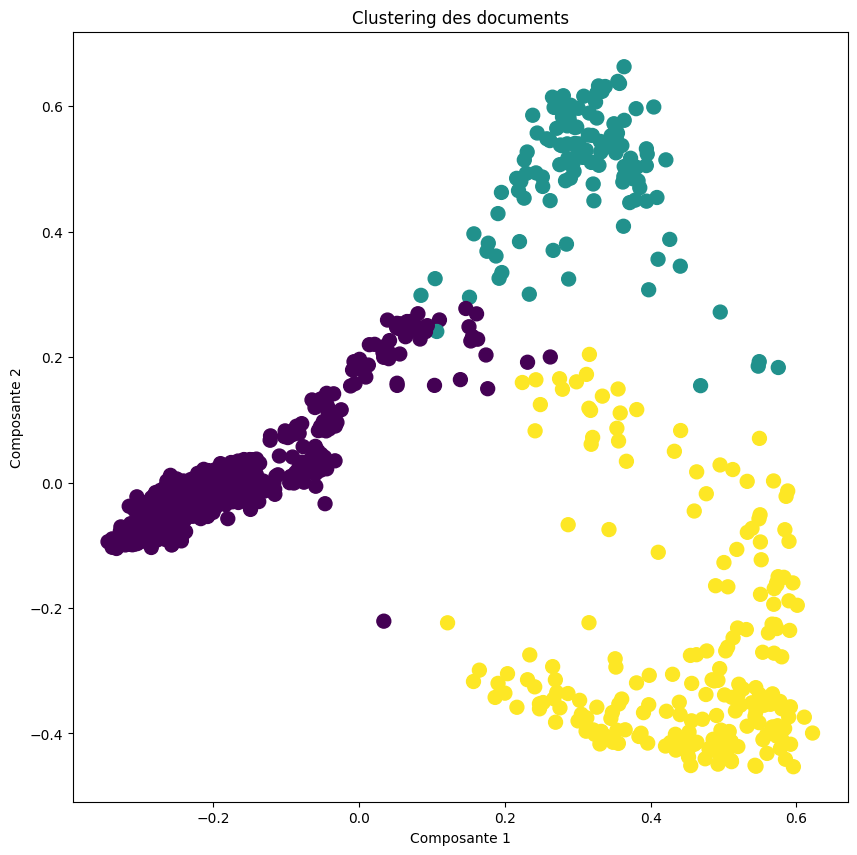

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(x_axis, y_axis, s=100, c=clusters)
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("Clustering des documents")
plt.savefig("clusters.png")  # le plot est sauvegardé
from PIL import Image
img = Image.open("clusters.png")
img.show()







4. Téléchargez sur l’UV le fichier zippé sents.txt, déjà segmenté en phrases,
et placez-le dans le dossier data

In [83]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [84]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [85]:
infile = f"../../data/sents.txt"
sentences = MySentences(infile)

5. Entraînez un modèle word2vec (word embeddings) sur ces phrases grâce
au notebook s3_word_embeddings.ipynb, en adaptant éventuellement les
paramètres window (taille de la fenêtre) et min_count (nombre minimum
d’occurrences d’un mot)

In [86]:
bigram_phrases = Phrases(sentences)

In [87]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

In [88]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [89]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [90]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [94]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=3, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=8, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: total: 32min 10s
Wall time: 10min 43s


6. Vous pouvez entraîner plusieurs modèles afin de comparer leurs performances, en procédant par essais-erreurs pour choisir le meilleur modèle

In [96]:
%%time
model2 = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=5, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: total: 21min 2s
Wall time: 6min 28s


In [97]:
%%time
model3 = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=10, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=5, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: total: 19min 45s
Wall time: 6min 19s


In [99]:
%%time
model4 = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=3, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=10, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=5, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: total: 18min 54s
Wall time: 6min 12s


In [101]:
outfile = f"../../data/newspapers.model"
model4.save(outfile)

7. Explorez le modèle retenu à l’aide des fonctions similarity et most_similar
(choisissez au moins trois exemples pour chaque fonction)

In [102]:
model = Word2Vec.load("../../data/newspapers.model")